0.15444620291
0.134058062229
0.56867829718
0.0127916998726


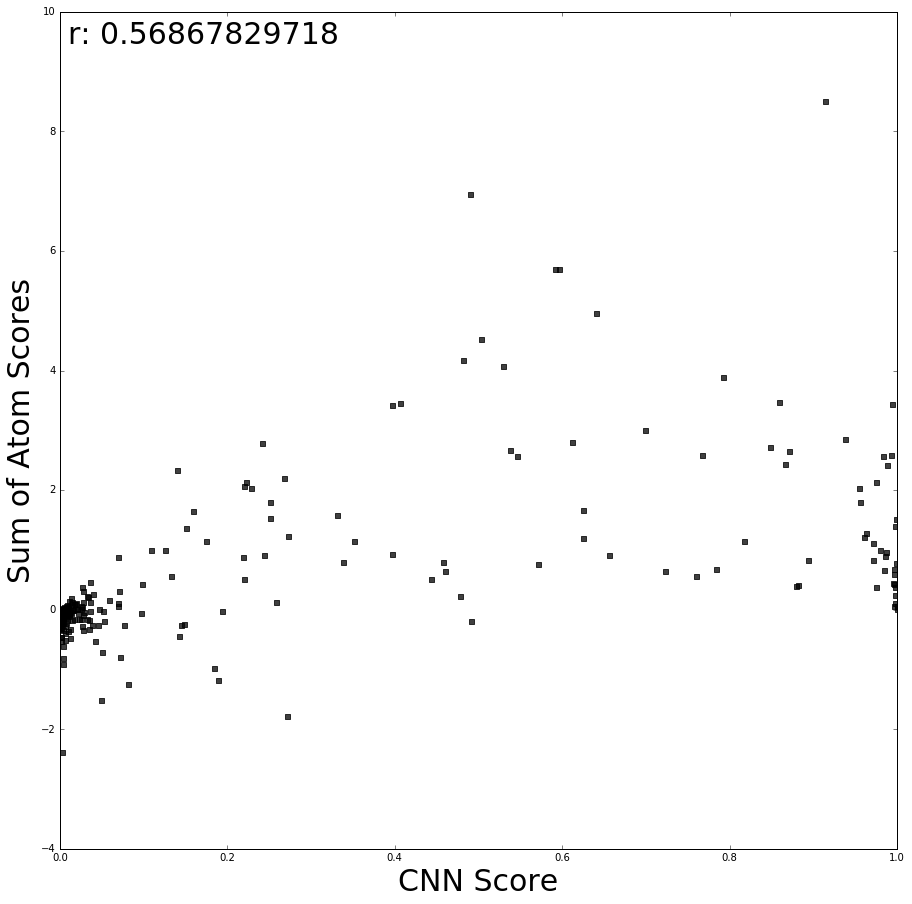

1.73503832328
-4.63710834204
0.491446975995
0.176057493512


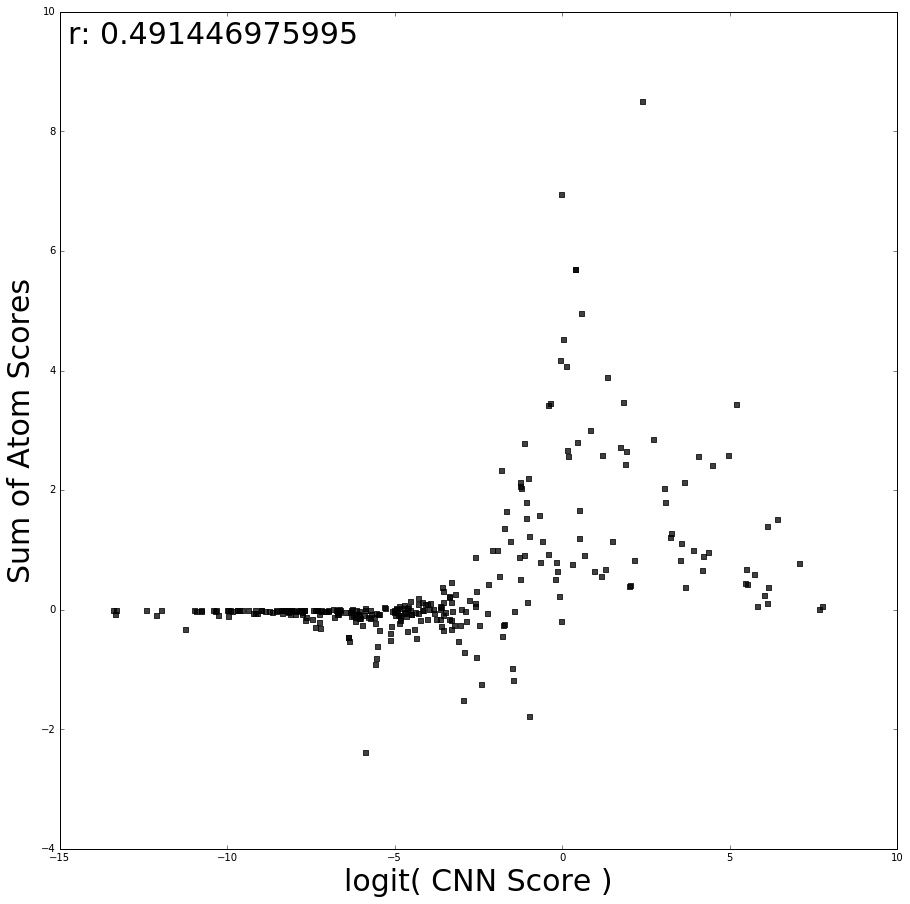

In [63]:
import numpy
from scipy import stats
import math
import string
import matplotlib.pyplot as plt
%matplotlib inline

def logit(x):
    return math.log(x/(1-x))

def CSARplot(useLogit = False):
    fileIn = open('/home/josh/CSAR_additivity.dat', 'r')

    pairList = []
    x = []
    y = []
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    for line in fileIn:
    
        split = string.split(line)
    
        name = str(split[0])
        name = string.split(name, '.')[0]
        
        sum = float(split[1])
        score = float(split[2])
        if useLogit:
            score = logit(score)

        pairList.append([name,sum,score])

    for pair in pairList:
        x.append(pair[1])
        y.append(pair[2])
    plt.scatter(y,x, color = "black", s=25, marker = "s", alpha = 0.75)

    plt.legend(fontsize = 20, loc = 4)
    plt.ylabel('Sum of Atom Scores', fontsize = 30)
    if not useLogit:
        plt.xlabel('CNN Score', fontsize = 30)
        plt.xlim(0, 1)
    else:
        plt.xlabel('logit( CNN Score )', fontsize = 30)

    corr = ""
    corr = numpy.corrcoef(x = x, y = y)[0][1]
    corr = "r = %5f" % corr
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    print(slope)
    print(intercept)
    print(r_value)
    print(std_err)

    #plt.text(0.01, 0.99, "m: "+str(slope),verticalalignment='top', horizontalalignment='left', fontsize = 30, transform = ax.transAxes)
    #plt.text(0.01, 0.94, "b: " +str(intercept),verticalalignment='top', horizontalalignment='left', fontsize = 30, transform = ax.transAxes)
    plt.text(0.01, 0.99, "r: "+str(r_value),verticalalignment='top', horizontalalignment='left', fontsize = 30, transform = ax.transAxes)
    #plt.text(0.01, 0.84, "SE: "+str(std_err),verticalalignment='top', horizontalalignment='left', fontsize = 30, transform = ax.transAxes)
    #for pair in pairList:

        #plt.annotate(pair[2], (pair[0],pair[1]))

    plt.show()
    
CSARplot()
CSARplot(useLogit = True)